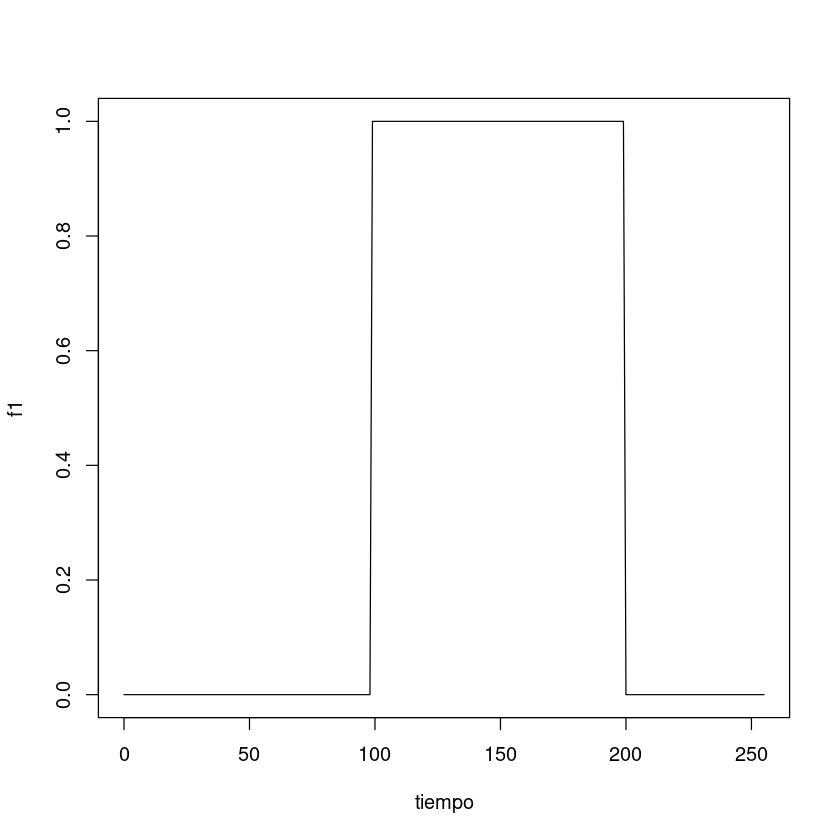

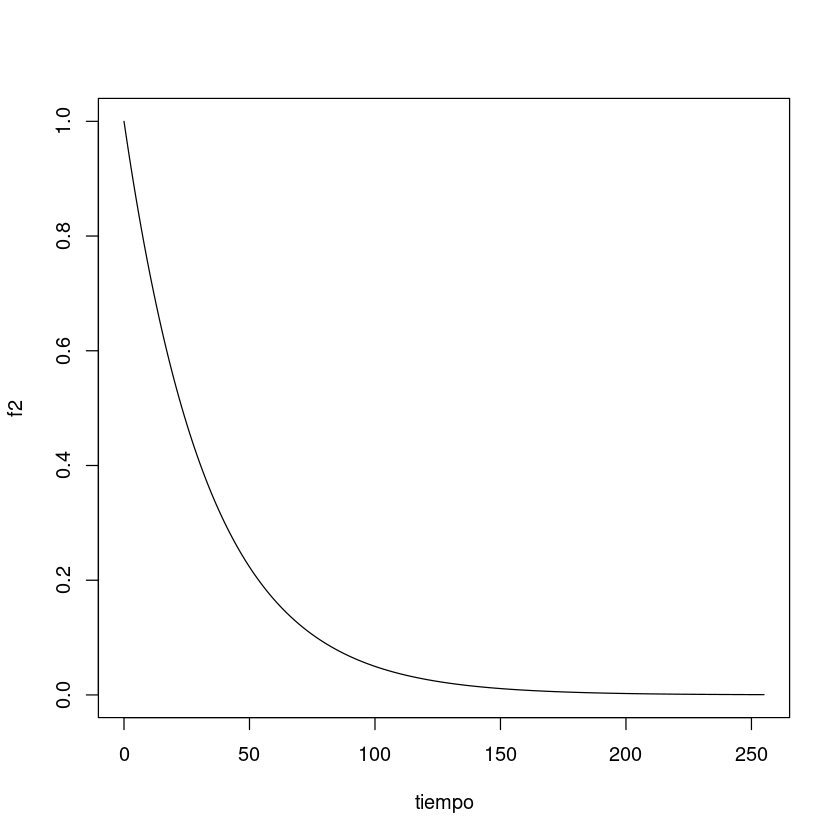

In [2]:
N = 256
tiempo = 0:(N-1)

# Convolucion de dos series de tiempo en el DT
# f1 pulso
f1 = rep(0,N)
f1 [100:200] = 1

# f2 exponencial decreciente
f2 = 1*exp(-0.03*tiempo)
plot(tiempo, f1, type='l')
plot(tiempo, f2, type='l')


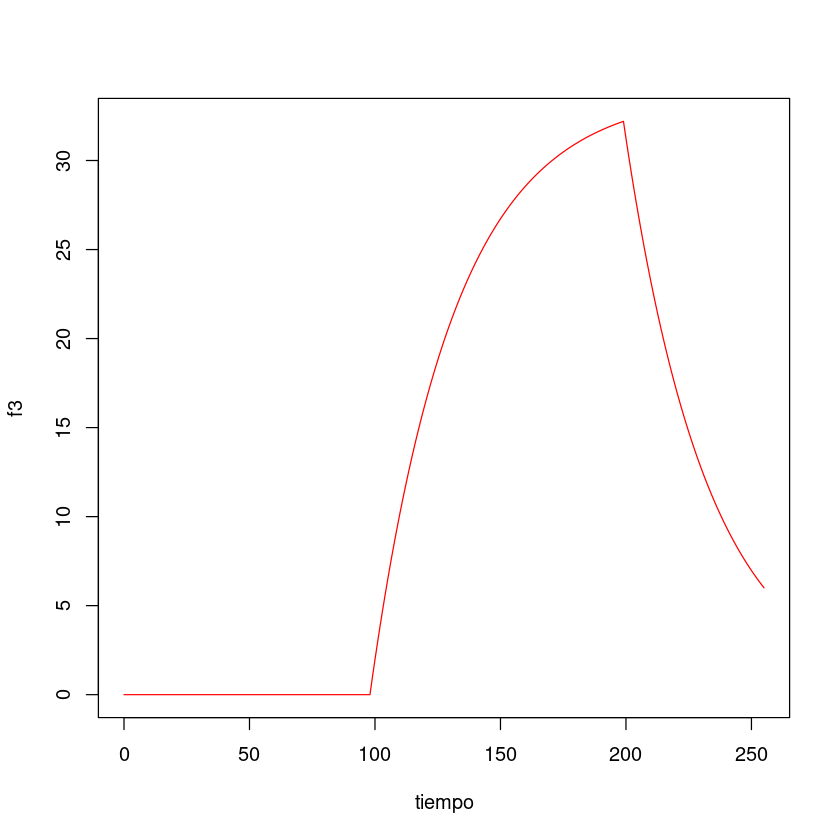

In [4]:
# algoritmo de convolucion en el dominio del tiempo
f3 = rep(NA, N)

for(i in 1:N)
{
    suma = 0
    j = 1
    while(j<=i)
    {
        suma = suma + f1[j]*f2[i-j+1]
        j = j+1
    }
    f3[i] = suma
    #print(i)
}

plot(tiempo, f3, type='l', col = 'red')

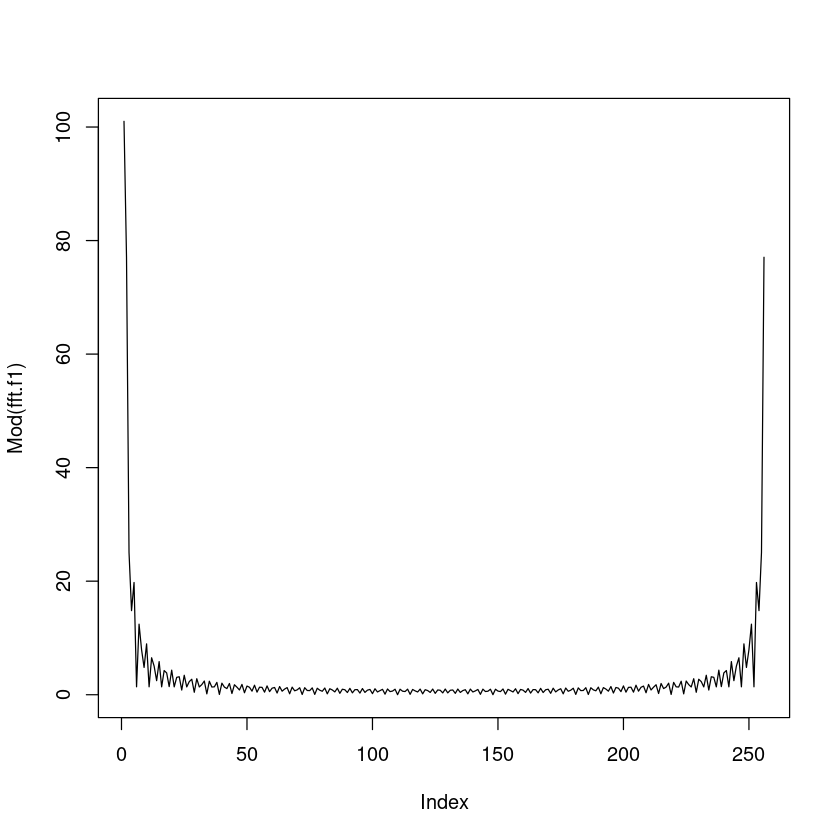

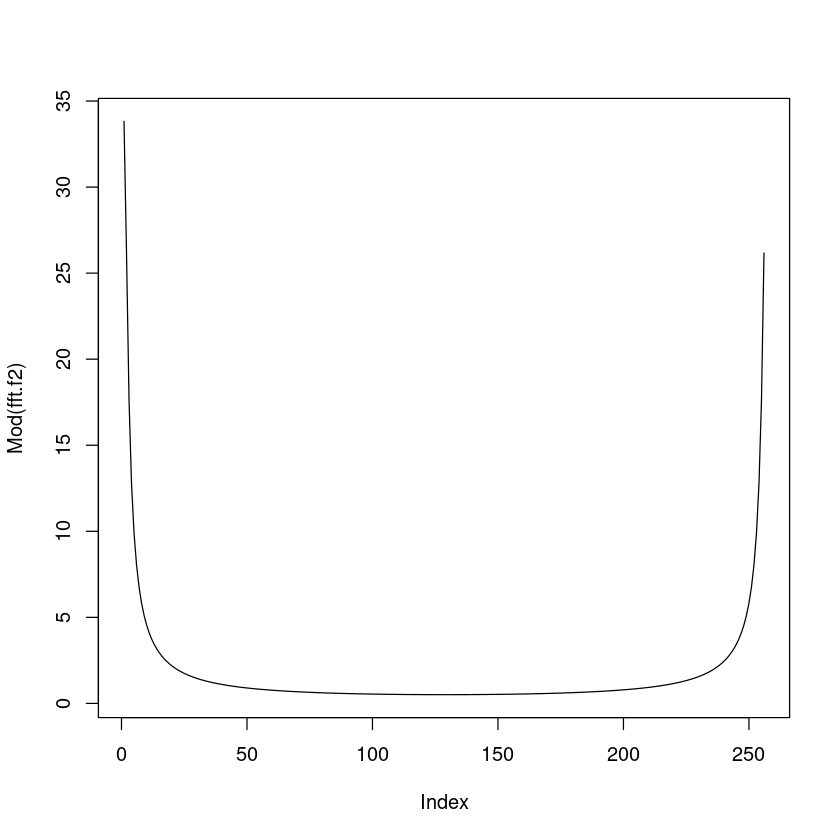

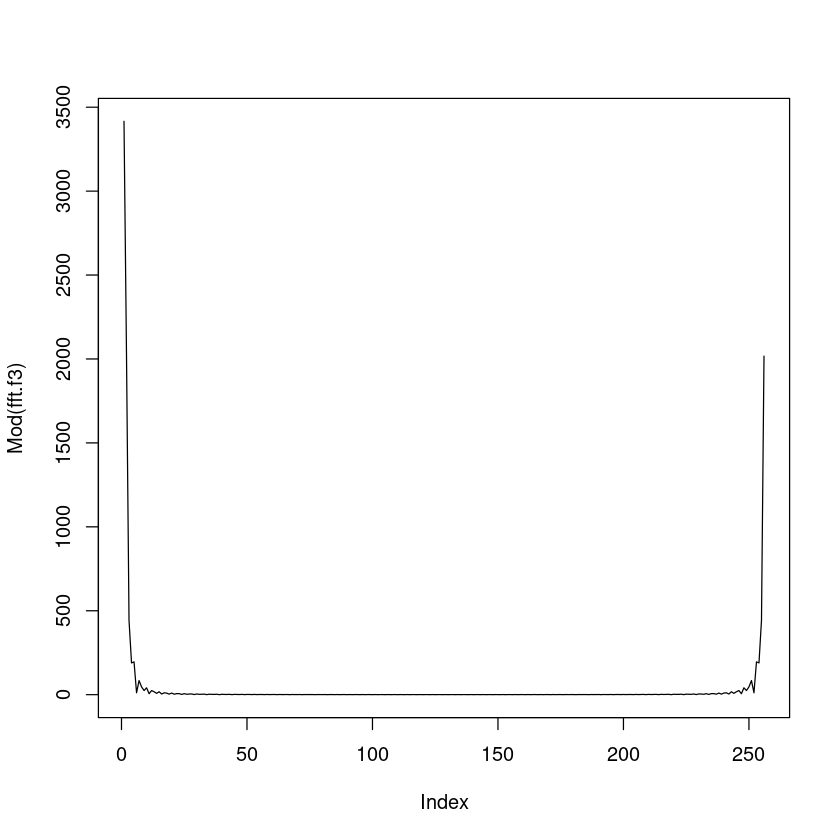

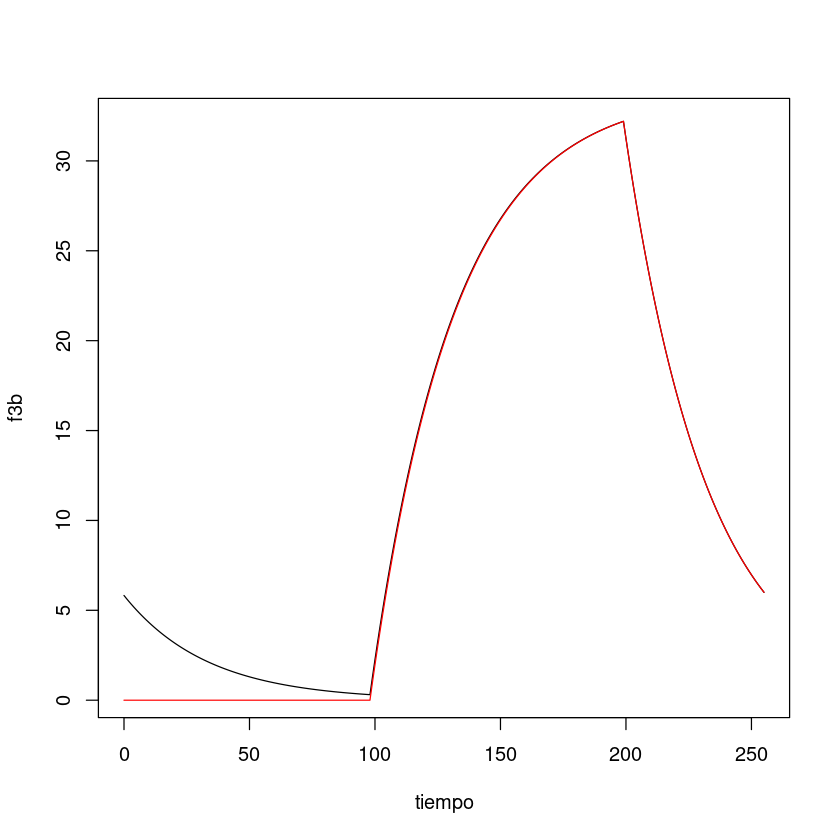

In [5]:
# convolucion en el DF
fft.f1 = fft (f1)
fft.f2 = fft (f2)

plot(Mod(fft.f1), type='l')
plot(Mod(fft.f2), type='l')

fft.f3 = fft.f1*fft.f2
plot(Mod(fft.f3), type='l')

f3b = Re(fft(fft.f3, inverse =TRUE)/N)
plot(tiempo,f3b,type='l')
lines(tiempo, f3 , col='red')

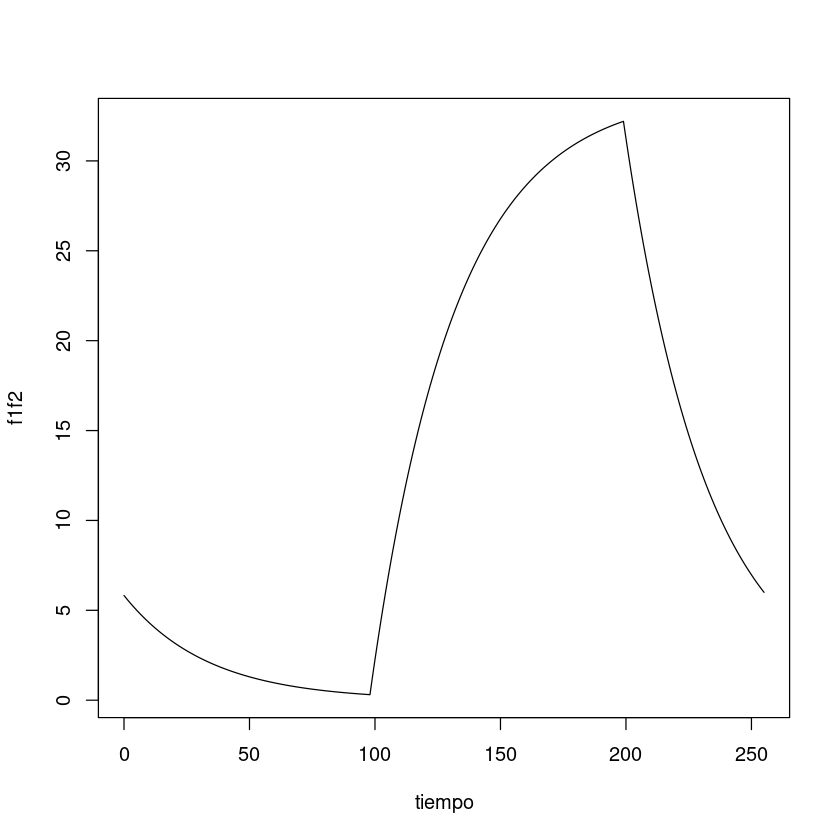

In [6]:
# convolucion con convolve
f1f2 = convolve(f1, f2, conj = FALSE)
plot(tiempo, f1f2, type='l')

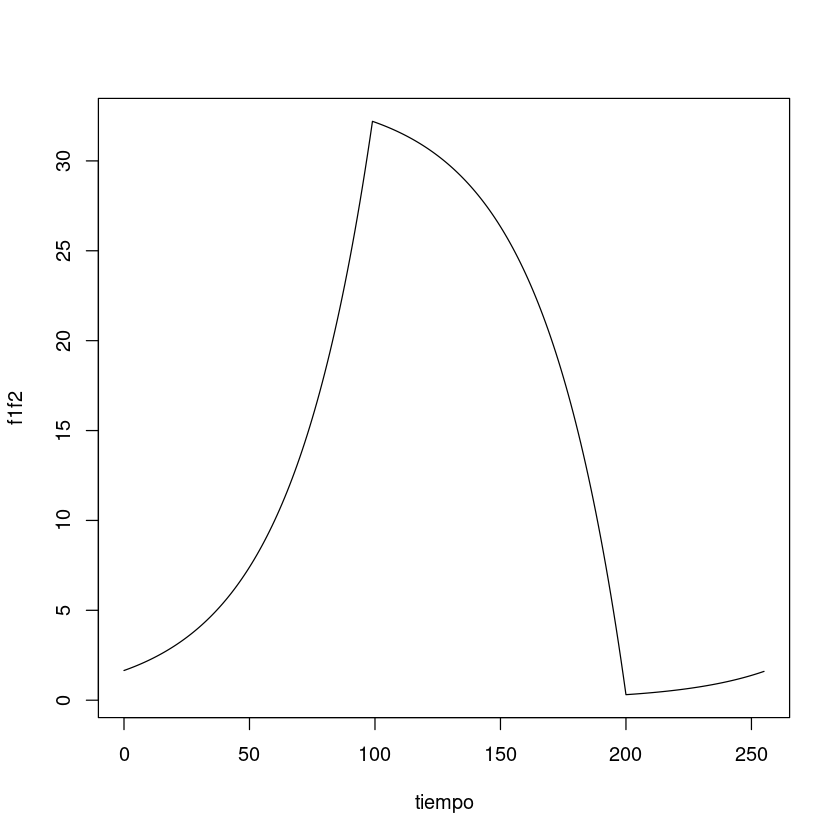

In [7]:
# correlacion cruzada con convolve
f1f2 = convolve(f1, f2 , conj = TRUE)
plot(tiempo, f1f2, type='l')

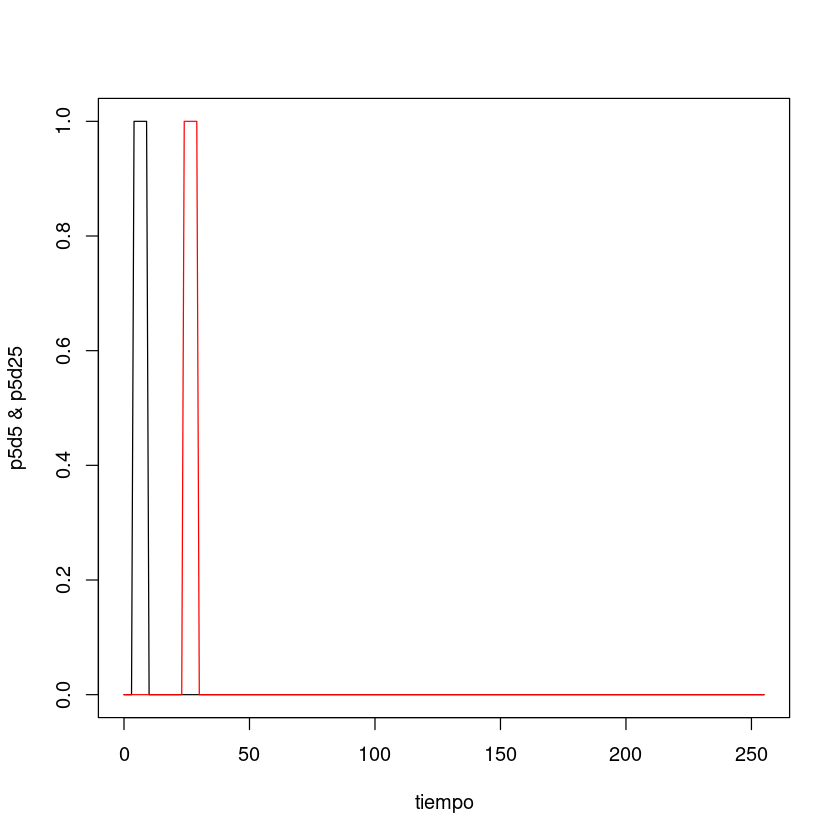

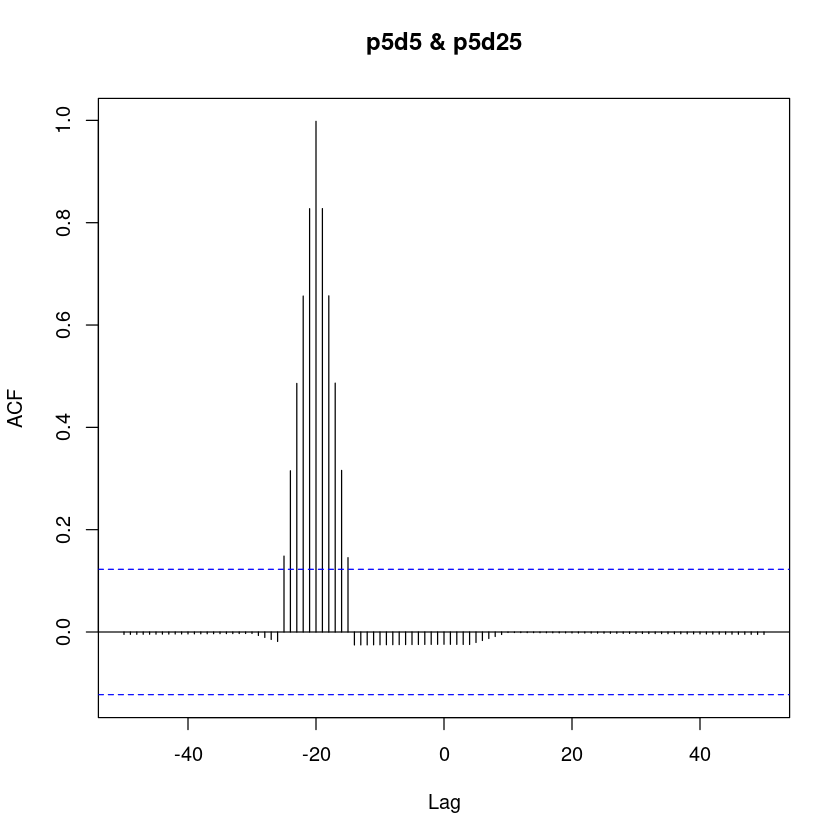

In [8]:
# Correlación cruzada de dos pulsos
p5d5 = rep(0,N)
p5d5[5:10] = 1

p5d25 = rep(0,N)
p5d25[25:30] = 1

plot(tiempo, p5d5, type='l', ylab='p5d5 & p5d25')
lines(tiempo, p5d25, col='red')

ccf(p5d5, p5d25, lag.max = 50)

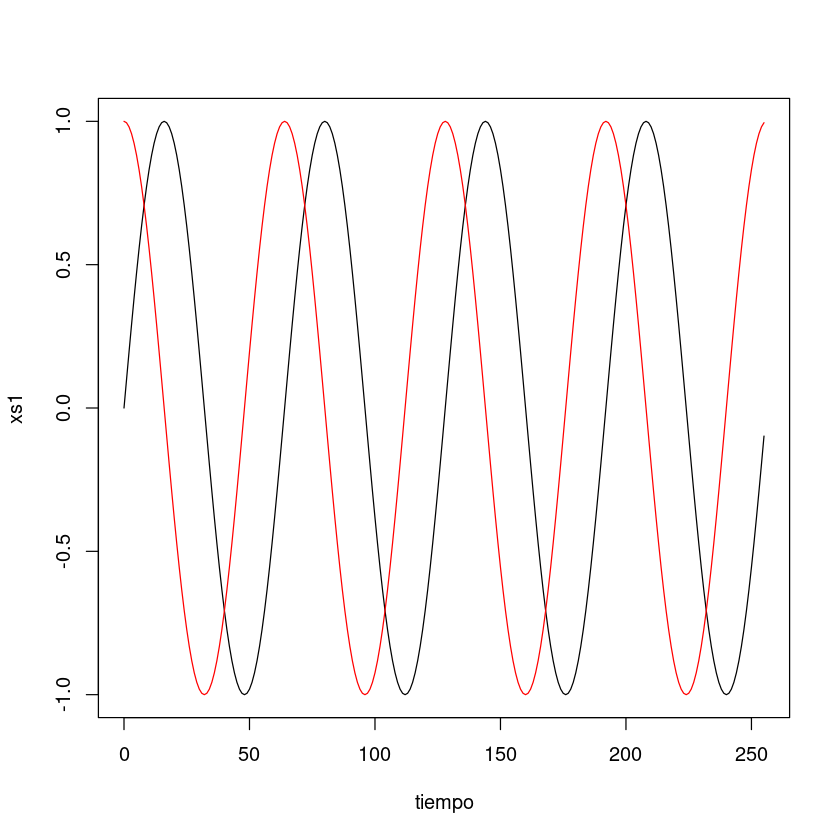

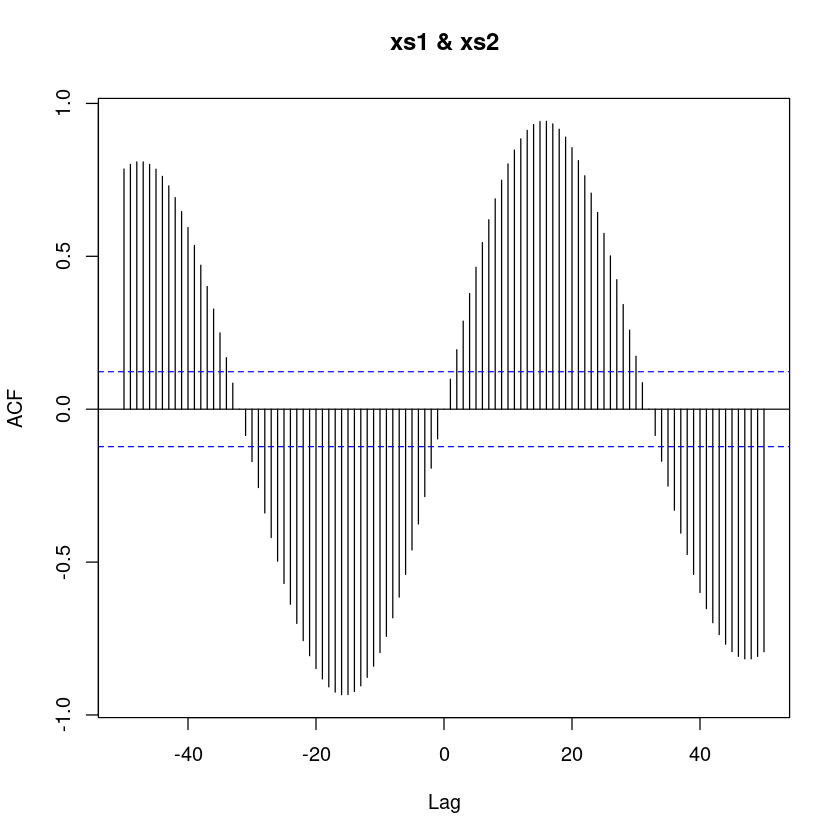

In [10]:
#Correlación cruzada de dos senoides
xs1 = sin(4*2*pi*tiempo/N)
xs2 = sin(4*2*pi*tiempo/N+pi/2)

# xs2 esta defasada en pi/2 = 16 muestras
plot(tiempo, xs1, type='l')
lines(tiempo, xs2, col='red')
ccf(xs1, xs2, lag.max = 50)

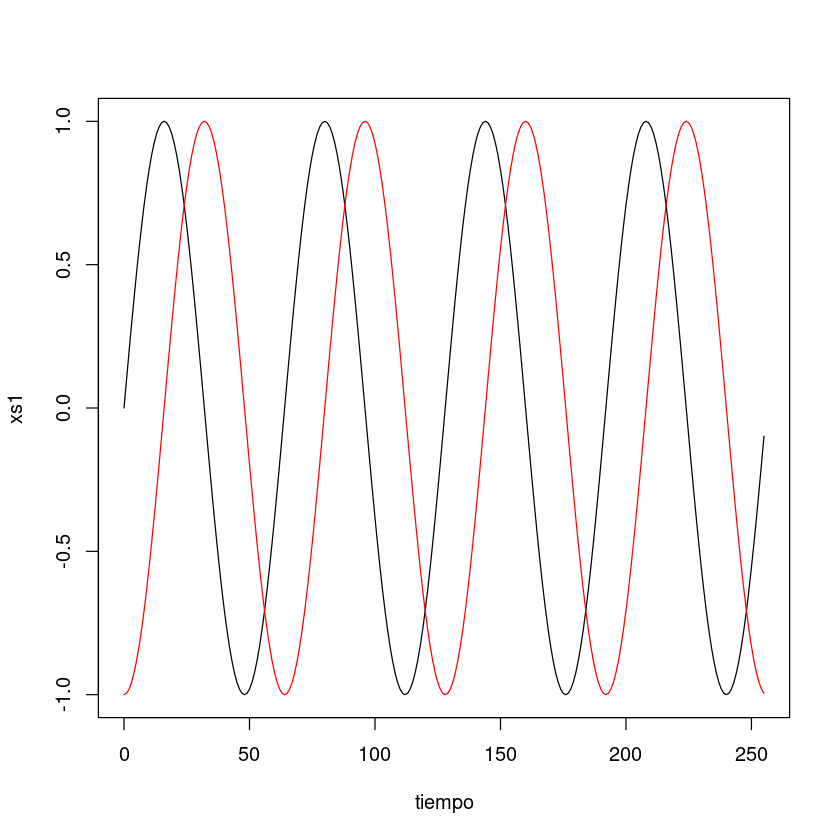

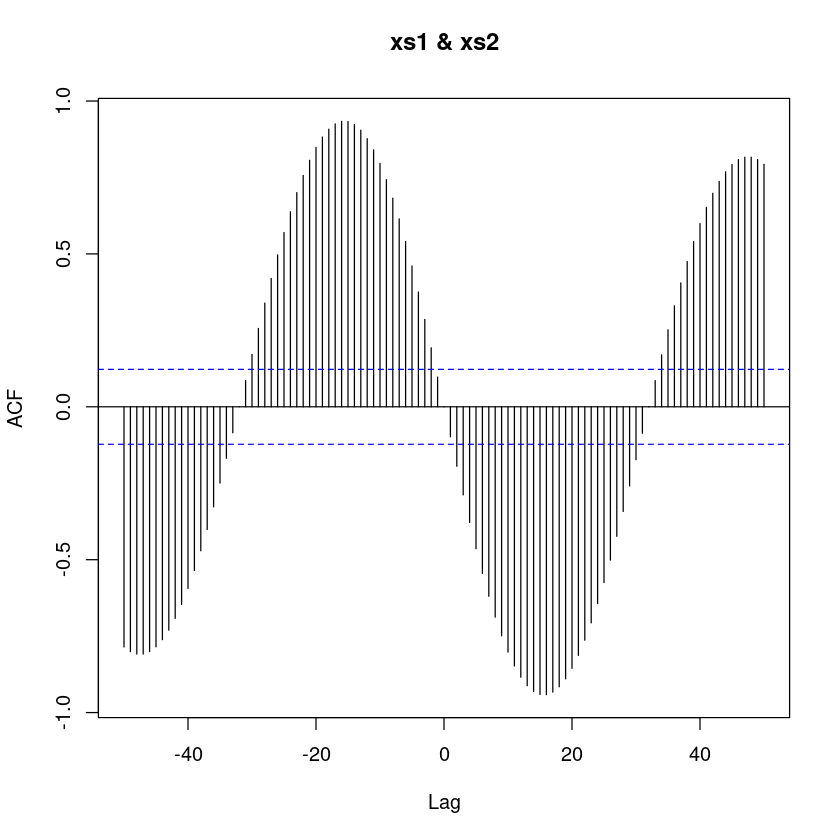

In [11]:
#Correlación cruzada de dos senoides
xs1 = sin(4*2*pi*tiempo/N)
xs2 = sin(4*2*pi*tiempo/N-pi/2)

# xs2 esta defasada en −pi/2 = −16 muestras
plot(tiempo, xs1, type='l')
lines(tiempo, xs2, col='red')
ccf(xs1, xs2, lag.max = 50)

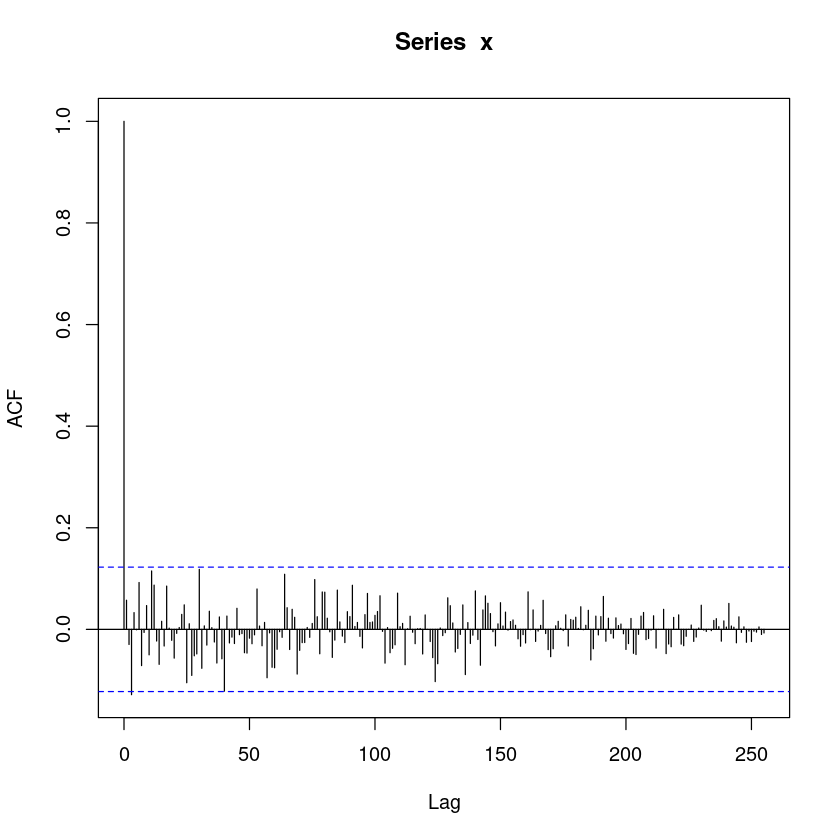

In [12]:
# Autocorrelación de ruido uniforme
N = 256
tiempo = 0:(N-1)
x = runif(N, min = -2, max = 2)
acf(x, lag.max = N)

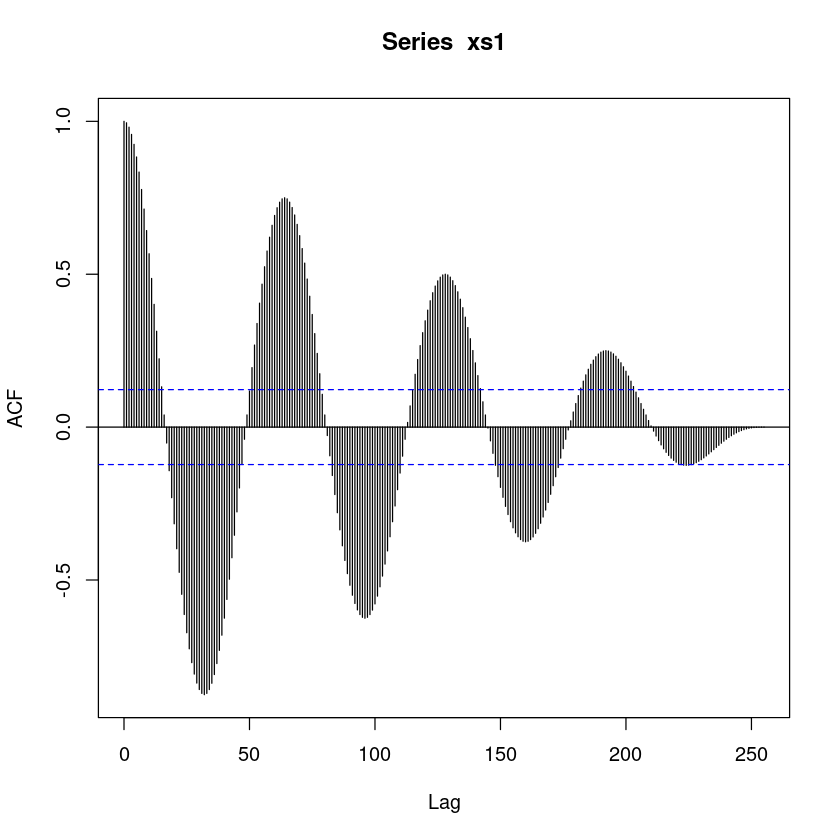

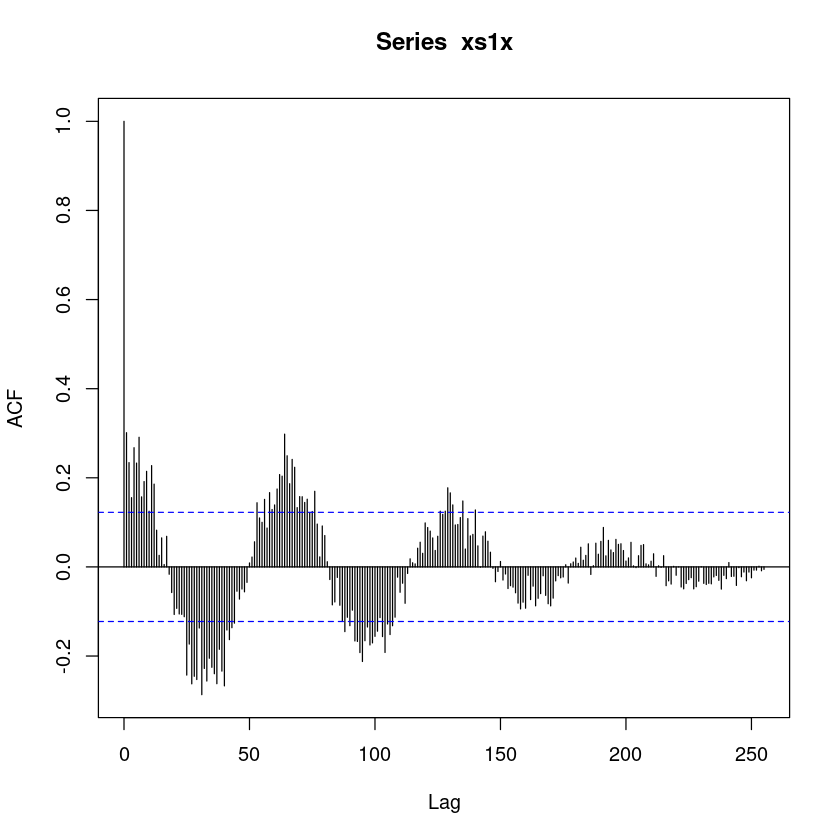

In [13]:
#Autocorrelación de una senoide con/sin ruido
# autocorrelacion de una senoide
xs1 = sin(4*2*pi*tiempo/N)
acf(xs1, lag.max = N)

# autocorrelacion de una senoide + ruido
xs1x = xs1 + x
acf(xs1x, lag.max = N)

[1] "X"      "t"      "localA" "localB"


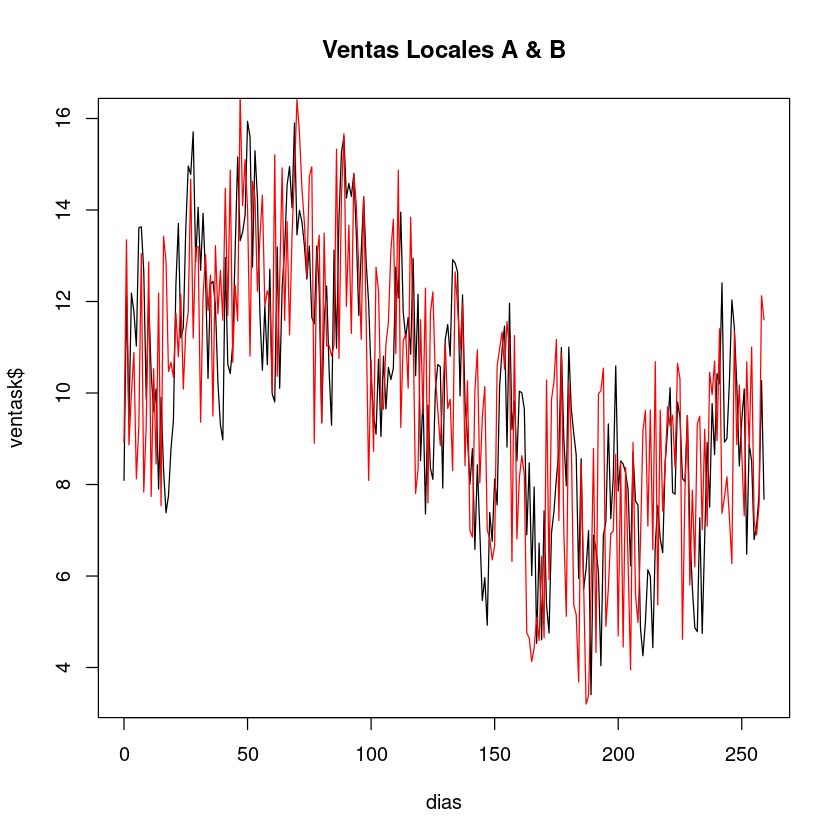

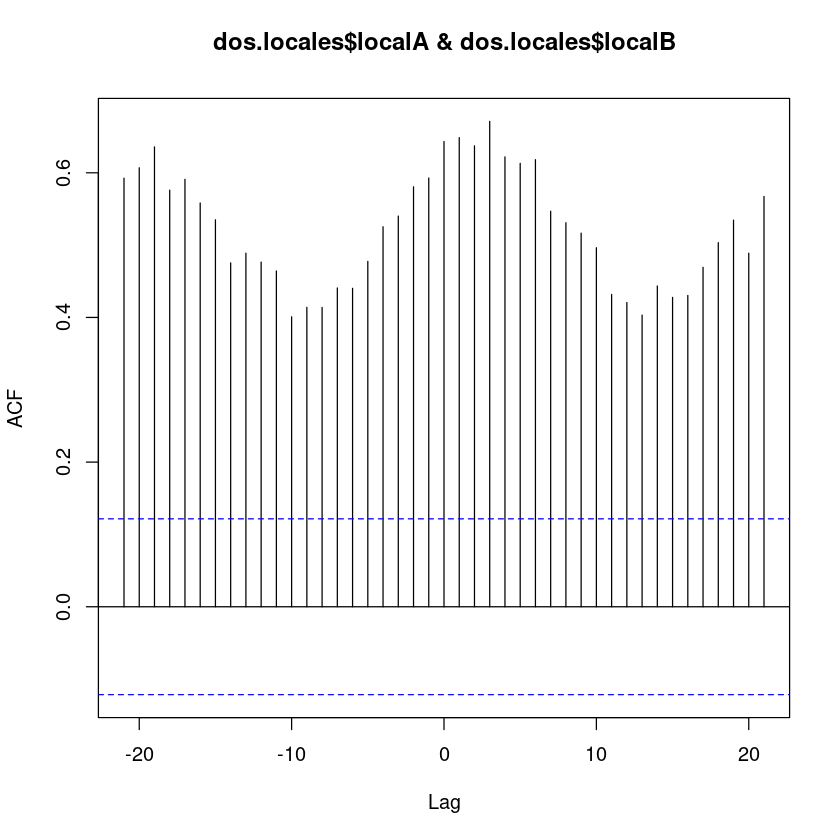

In [15]:
# Ejercicio: analizar las ventas de dos locales
dir = '/home/marcelo/Dropbox/Series_Temporales_2022/'
dos.locales = read.csv('DosLocales.csv')
print(names(dos.locales ))
# [1] "X" "t" "localA" "localB"

plot(dos.locales$t, dos.locales$localA, type = 'l', main='Ventas Locales A & B',
     xlab='dias', ylab='ventask$')
lines(dos.locales$t, dos.locales$localB, col = 'red')

ccf(dos.locales$localA, dos.locales$localB)

In [17]:
# Ejercicio: simulación de las ventas de los dos locales
N = 260
tiempo = 0:(N-1)

xs1 = 2*sin(12*2*pi*tiempo/N)
xs2 = 1*sin(12*2*pi*tiempo/N+pi/3)
xs3 = 3*sin(2*pi*tiempo/N)

x1 = runif(N,min = -2,max = 2)
x2 = runif(N,min = -3,max = 3)

xsa = xs1 + xs3 + x1 + 10
xsb = xs2 + xs3 + x2 + 10

dir = '/home/marcelo/Dropbox/Series_Temporales_2022/'
res = data.frame(t=tiempo, localA=xsa, localB=xsb)
write.csv(res, paste(dir, 'DosLocales2.csv', sep=''))

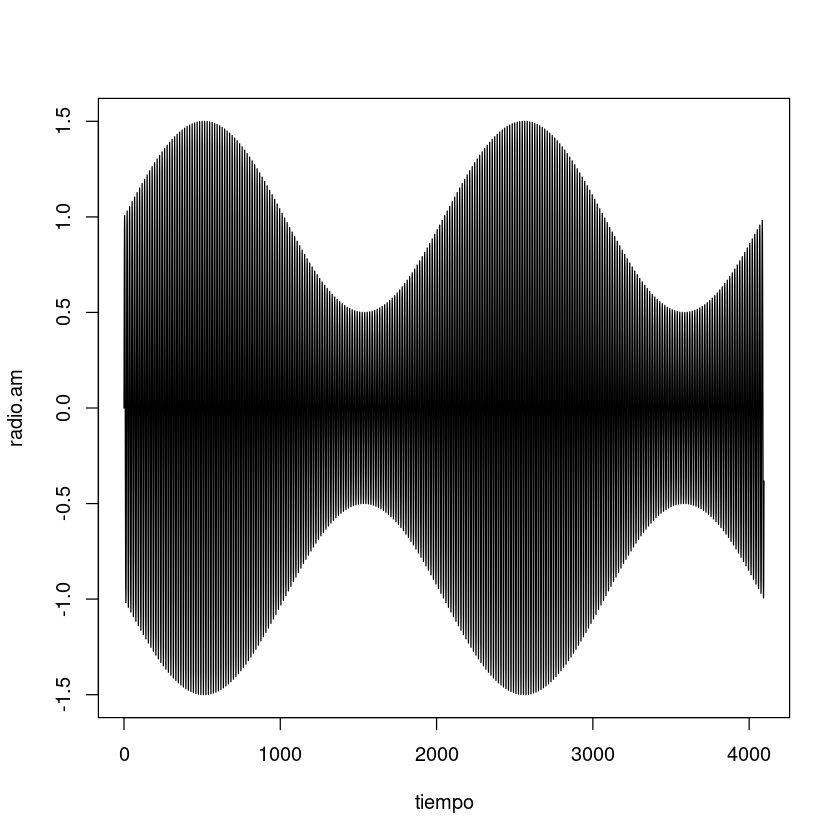

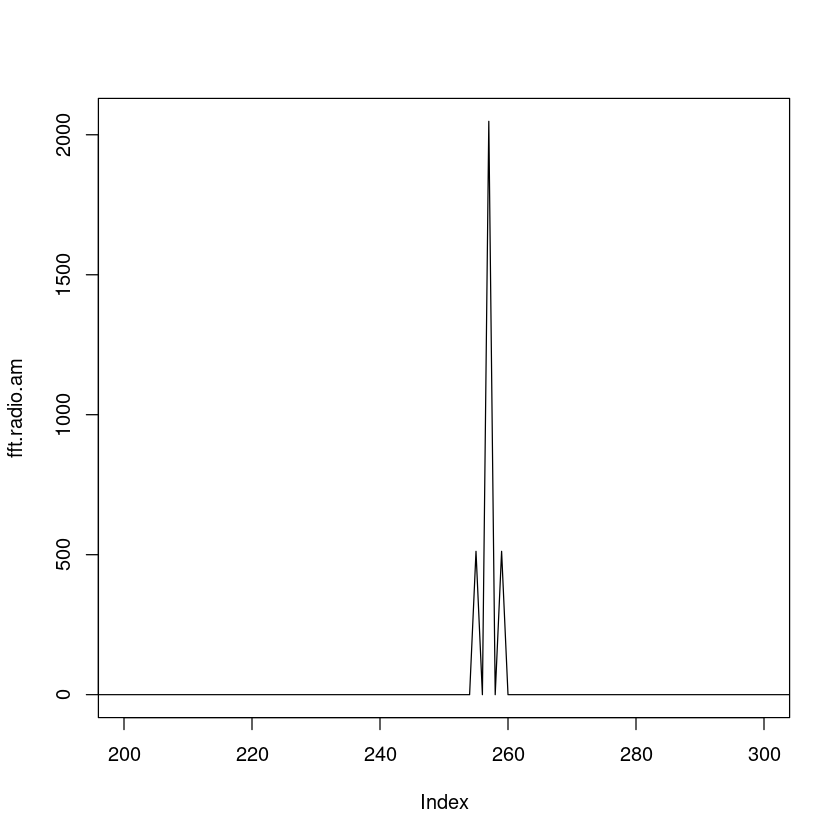

In [19]:
#Ejercicio: radio AM, multiplicación DT => convolución DF
# ejemplo AM (amplitud modulada)
N = 16*256
tiempo = 0:(N-1)

cm = 0.5 # coef de modulacion
portadora = sin(256*2*pi*tiempo/N)
moduladora = sin(2*2*pi*tiempo/N)
radio.am = (1+cm*moduladora)*portadora

plot(tiempo, radio.am,type='l')
fft.radio.am = Mod(fft(radio.am))
plot(fft.radio.am, type='l', xlim=c(200,300))